Following results are from these parameters:
```
arch_dict = {'n_layers': 2,
 'n_hidden': 128,
 'n_latent_shared': 32,
 'n_latent_attribute': 32,
 'dropout_rate': 0.1,
 'weighted_classifier': True,
}
train_dict = {
 'max_epochs': 1000,
 'batch_size': 256,
 'recon_weight': 20,
 'cf_weight': 0.8,
 'beta': 0.003,
 'clf_weight': 0.05,
 'adv_clf_weight': 0.014,
 'adv_period': 5,
 'n_cf': 1,
 'early_stopping_patience': 6,
 'early_stopping': True,
 'save_best': True,
 'kappa_optimizer2': False,
 'n_epochs_pretrain_ae': 0,
}

plan_kwargs = {
 'lr': 0.003,
 'weight_decay': 0.00005,
 'new_cf_method': True,
 'lr_patience': 5,
 'lr_factor': 0.5,
 'lr_scheduler_metric': 'loss_validation',
 'n_epochs_kl_warmup': 10,
}
```

26 August 2024

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
split_names_map = {
    '1': 'ImmuneCT Lung: Female2Male',
    '2': 'Epithelial luminal: Female2Male & Breast2Prostate',
    '4': 'Immune Male: Ventricle2Lung',
}
csv_path = '/lustre/scratch126/cellgen/team205/aa34/Arian/Dis2P/dis2p_reproducibility_clean/reproduce_benchmarks/eraslan/cf_results/'
split_results = {}
for file in os.listdir(csv_path):
    if not file.endswith('delta_pearson.csv') and ('noCT' in file) and ('pearson' in file):
        print(file)
        split = file.split('_')[-2]
        split = split_names_map[split]
        split_results[split] = pd.read_csv(csv_path + file, index_col=0)
        split_results[split]['Split'] = split
        split_results[split]['Genes'] = split_results[split].index

eraslan_bingo_noCT_split_4_pearson.csv
eraslan_bingo_noCT_split_1_pearson.csv
eraslan_bingo_noCT_split_2_pearson.csv


In [3]:
split_results[split]

,Dis2P,Biolord,scdisinfact,Control,Dis2P_var,Biolord_var,scdisinfact_var,Control_var,Split,Genes
20,0.890063,-0.072865,-0.099657,-0.323958,0.777125,-0.183853,-0.244191,-0.311901,Epithelial luminal: Female2Male & Breast2Prostate,20
all,0.490343,0.503099,0.356426,0.282120,0.572223,0.431450,0.383392,0.292532,Epithelial luminal: Female2Male & Breast2Prostate,all


In [4]:
df_concat = pd.concat(split_results.values())
df_concat

,Dis2P,Biolord,Control,Dis2P_var,Biolord_var,Control_var,Split,Genes,scdisinfact,scdisinfact_var
20,0.255474,-0.076317,-0.080624,0.044642,-0.068537,-0.041129,Immune Male: Ventricle2Lung,20,NaN,NaN
all,0.712234,0.474361,0.616778,0.679051,0.493180,0.673252,Immune Male: Ventricle2Lung,all,NaN,NaN
20,0.558876,0.349302,-0.177464,0.003627,0.617953,-0.143755,ImmuneCT Lung: Female2Male,20,0.368665,0.693951
all,0.724860,0.434762,0.780245,0.813630,0.441767,0.777139,ImmuneCT Lung: Female2Male,all,0.569892,0.664154
20,0.890063,-0.072865,-0.323958,0.777125,-0.183853,-0.311901,Epithelial luminal: Female2Male & Breast2Prostate,20,-0.099657,-0.244191
all,0.490343,0.503099,0.282120,0.572223,0.431450,0.292532,Epithelial luminal: Female2Male & Breast2Prostate,all,0.356426,0.383392


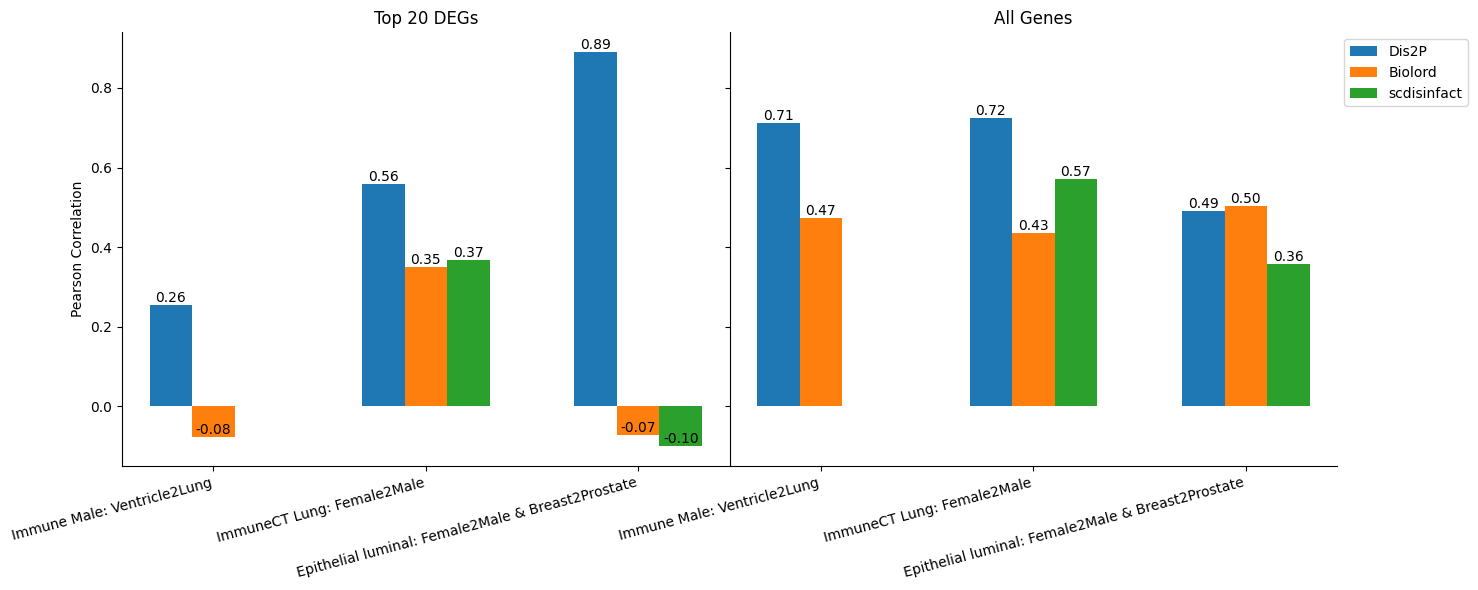

In [6]:
# Using the provided dataframe as df_concat
# Assuming df_concat is already defined in the environment

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot for Genes == 20
df_20 = df_concat[df_concat['Genes'] == '20'].reset_index(drop=True)
x_20 = np.arange(len(df_20))

for i, col in enumerate(['Dis2P', 'Biolord', 'scdisinfact']):
    if col == 'scdisinfact':
        mask = ~df_20[col].isna()
        axes[0].bar(x_20[mask] + i*0.2, df_20.loc[mask, col], width=0.2, label=col)
        for j in x_20[mask]:
            axes[0].text(j + i*0.2, df_20.at[j, col], f'{df_20.at[j, col]:.2f}', ha='center', va='bottom')
    else:
        axes[0].bar(x_20 + i*0.2, df_20[col], width=0.2, label=col)
        for j in x_20:
            axes[0].text(j + i*0.2, df_20.at[j, col], f'{df_20.at[j, col]:.2f}', ha='center', va='bottom')

axes[0].set_xticks(x_20 + 0.2)
axes[0].set_xticklabels(df_20['Split'], rotation=15, ha='right')
axes[0].set_title('Top 20 DEGs')

# Plot for Genes == all
df_all = df_concat[df_concat['Genes'] == 'all'].reset_index(drop=True)
x_all = np.arange(len(df_all))

for i, col in enumerate(['Dis2P', 'Biolord', 'scdisinfact']):
    if col == 'scdisinfact':
        mask = ~df_all[col].isna()
        axes[1].bar(x_all[mask] + i*0.2, df_all.loc[mask, col], width=0.2, label=col)
        for j in x_all[mask]:
            axes[1].text(j + i*0.2, df_all.at[j, col], f'{df_all.at[j, col]:.2f}', ha='center', va='bottom')
    else:
        axes[1].bar(x_all + i*0.2, df_all[col], width=0.2, label=col)
        for j in x_all:
            axes[1].text(j + i*0.2, df_all.at[j, col], f'{df_all.at[j, col]:.2f}', ha='center', va='bottom')

axes[1].set_xticks(x_all + 0.2)
axes[1].set_xticklabels(df_all['Split'], rotation=15, ha='right')
axes[1].set_title('All Genes')

# Adding labels and legend
axes[0].set_ylabel('Pearson Correlation')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].spines[['right', 'top']].set_visible(False)
axes[1].spines[['right', 'top']].set_visible(False)


plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)

plt.show()


In [ ]:
ax = sns.barplot(df_concat.loc[['20'], ['Dis2P', 'Biolord', 'scdisinfact']], errorbar='se', )
# ax.set(ylabel='Delta Pearson Correlation', title='Top 20 DEGs | Mean over all cell types: Control --> Salmonella\nOOD: Control + Salmonella')

# Add the value numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2 -0.2,  # x coordinate of the text
        height,  # y coordinate of the text
        f'{height:.2f}',  # text to be displayed
        ha='center',  # horizontal alignment
        va='bottom'  # vertical alignment
    )

plt.show()

In [19]:
df_concat.loc[['20'], ['Dis2P', 'Biolord', 'scdisinfact', 'Split']]

,Dis2P,Biolord,scdisinfact,Split
20,0.153571,0.177618,NaN,Immune Male: Ventricle2Lung
20,0.824099,0.233576,-0.007948,Epithelial luminal: Female2Male & Breast2Prostate
20,0.698585,0.441221,0.537527,ImmuneCT Lung: Female2Male


In [10]:
split_names_map = {
    '1': 'ImmuneCT Lung: Female2Male',
    '2': 'Epithelial luminal: Female2Male & Breast2Prostate',
    '4': 'Immune Male: Ventricle2Lung',
}
csv_path = '/lustre/scratch126/cellgen/team205/aa34/Arian/Dis2P/dis2p_reproducibility_clean/reproduce_benchmarks/eraslan/cf_results/'
split_results = {}
for file in os.listdir(csv_path):
    if file.endswith('emd.csv') and ('noCT' in file):
        print(file)
        split = file.split('_')[-2]
        split = split_names_map[split]
        split_results[split] = pd.read_csv(csv_path + file, index_col=0)
        split_results[split]['Split'] = split
        split_results[split]['Genes'] = split_results[split].index

eraslan_bingo_noCT_split_1_emd.csv
eraslan_bingo_noCT_split_2_emd.csv
eraslan_bingo_noCT_split_4_emd.csv


In [11]:
df_concat = pd.concat(split_results.values())
df_concat

,Dis2P,Biolord,scdisinfact,Control,Split,Genes
20,0.252316,0.290630,0.332086,0.266136,ImmuneCT Lung: Female2Male,20
all,0.064148,0.084010,0.103295,0.035201,ImmuneCT Lung: Female2Male,all
20,0.506077,0.536012,0.581306,0.636810,Epithelial luminal: Female2Male & Breast2Prostate,20
all,0.108249,0.109295,0.131143,0.088362,Epithelial luminal: Female2Male & Breast2Prostate,all
20,0.378380,0.400649,NaN,0.413674,Immune Male: Ventricle2Lung,20
all,0.069088,0.106602,NaN,0.048182,Immune Male: Ventricle2Lung,all


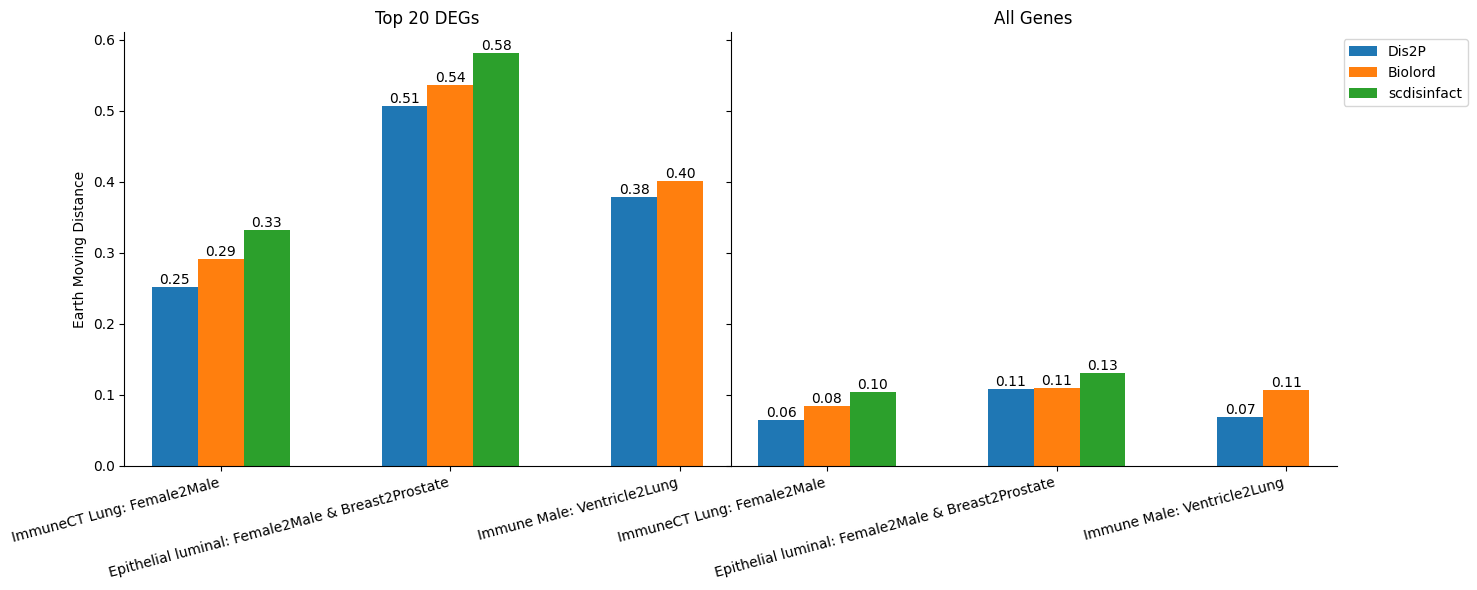

In [12]:
# Using the provided dataframe as df_concat
# Assuming df_concat is already defined in the environment

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot for Genes == 20
df_20 = df_concat[df_concat['Genes'] == '20'].reset_index(drop=True)
x_20 = np.arange(len(df_20))

for i, col in enumerate(['Dis2P', 'Biolord', 'scdisinfact']):
    if col == 'scdisinfact':
        mask = ~df_20[col].isna()
        axes[0].bar(x_20[mask] + i*0.2, df_20.loc[mask, col], width=0.2, label=col)
        for j in x_20[mask]:
            axes[0].text(j + i*0.2, df_20.at[j, col], f'{df_20.at[j, col]:.2f}', ha='center', va='bottom')
    else:
        axes[0].bar(x_20 + i*0.2, df_20[col], width=0.2, label=col)
        for j in x_20:
            axes[0].text(j + i*0.2, df_20.at[j, col], f'{df_20.at[j, col]:.2f}', ha='center', va='bottom')

axes[0].set_xticks(x_20 + 0.2)
axes[0].set_xticklabels(df_20['Split'], rotation=15, ha='right')
axes[0].set_title('Top 20 DEGs')

# Plot for Genes == all
df_all = df_concat[df_concat['Genes'] == 'all'].reset_index(drop=True)
x_all = np.arange(len(df_all))

for i, col in enumerate(['Dis2P', 'Biolord', 'scdisinfact']):
    if col == 'scdisinfact':
        mask = ~df_all[col].isna()
        axes[1].bar(x_all[mask] + i*0.2, df_all.loc[mask, col], width=0.2, label=col)
        for j in x_all[mask]:
            axes[1].text(j + i*0.2, df_all.at[j, col], f'{df_all.at[j, col]:.2f}', ha='center', va='bottom')
    else:
        axes[1].bar(x_all + i*0.2, df_all[col], width=0.2, label=col)
        for j in x_all:
            axes[1].text(j + i*0.2, df_all.at[j, col], f'{df_all.at[j, col]:.2f}', ha='center', va='bottom')

axes[1].set_xticks(x_all + 0.2)
axes[1].set_xticklabels(df_all['Split'], rotation=15, ha='right')
axes[1].set_title('All Genes')

# Adding labels and legend
axes[0].set_ylabel('Earth Moving Distance')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].spines[['right', 'top']].set_visible(False)
axes[1].spines[['right', 'top']].set_visible(False)


plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)

plt.show()


In [14]:
split_names_map = {
    '1': 'ImmuneCT Lung: Female2Male',
    '2': 'Epithelial luminal: Female2Male & Breast2Prostate',
    '4': 'Immune Male: Ventricle2Lung',
}
csv_path = '/lustre/scratch126/cellgen/team205/aa34/Arian/Dis2P/dis2p_reproducibility_clean/reproduce_benchmarks/eraslan/cf_results/'
split_results = {}
for file in os.listdir(csv_path):
    if file.endswith('delta_pearson.csv') and ('noCT' in file) and ('pearson' in file):
        print(file)
        split = file.split('_')[-3]
        split = split_names_map[split]
        split_results[split] = pd.read_csv(csv_path + file, index_col=0)
        split_results[split]['Split'] = split
        split_results[split]['Genes'] = split_results[split].index

eraslan_bingo_noCT_split_1_delta_pearson.csv
eraslan_bingo_noCT_split_2_delta_pearson.csv
eraslan_bingo_noCT_split_4_delta_pearson.csv


In [15]:
df_concat = pd.concat(split_results.values())
df_concat

,Dis2P,Biolord,scdisinfact,Dis2P_var,Biolord_var,scdisinfact_var,Split,Genes
20,0.907914,0.607062,0.678736,0.253970,0.860955,0.704779,ImmuneCT Lung: Female2Male,20
all,0.144577,0.156743,0.223249,0.176669,-0.059896,-0.077502,ImmuneCT Lung: Female2Male,all
20,0.729915,0.608141,0.585211,0.641868,0.624486,0.626758,Epithelial luminal: Female2Male & Breast2Prostate,20
all,0.400255,0.414734,0.240393,0.151826,0.098920,0.069973,Epithelial luminal: Female2Male & Breast2Prostate,all
20,0.354919,0.188322,NaN,0.106589,0.090089,NaN,Immune Male: Ventricle2Lung,20
all,0.458068,0.269677,NaN,0.008101,-0.248904,NaN,Immune Male: Ventricle2Lung,all


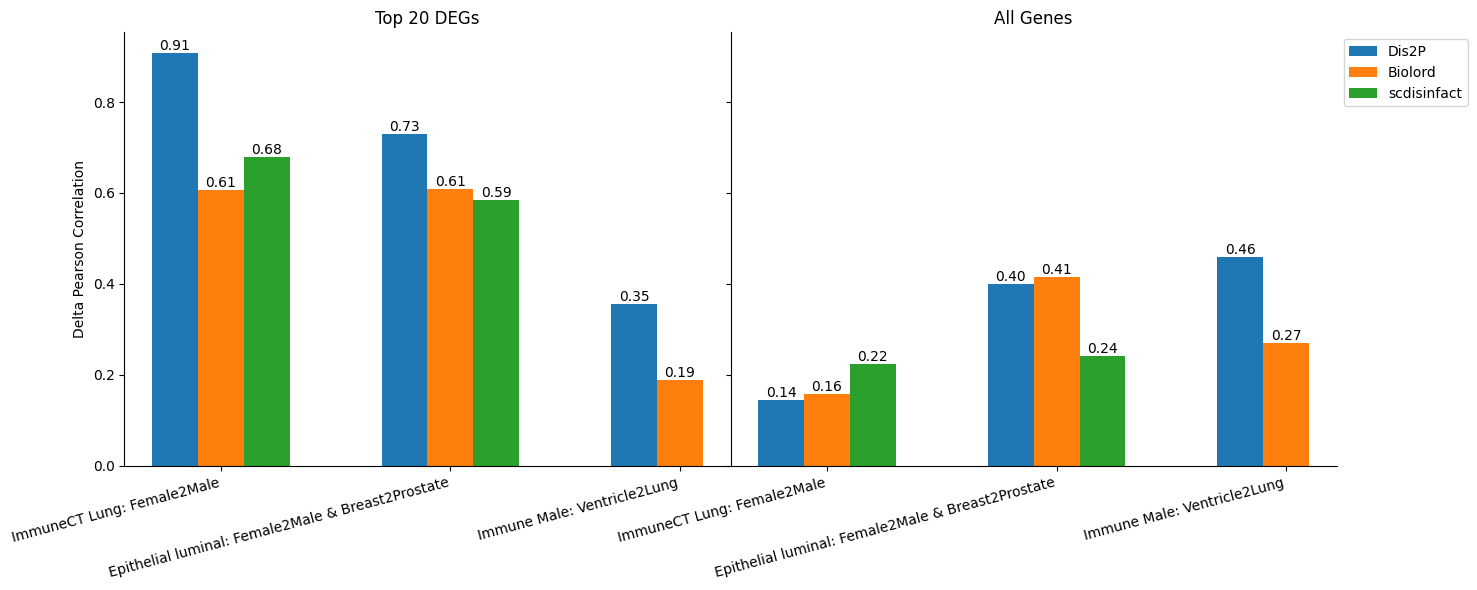

In [16]:
# Using the provided dataframe as df_concat
# Assuming df_concat is already defined in the environment

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot for Genes == 20
df_20 = df_concat[df_concat['Genes'] == '20'].reset_index(drop=True)
x_20 = np.arange(len(df_20))

for i, col in enumerate(['Dis2P', 'Biolord', 'scdisinfact']):
    if col == 'scdisinfact':
        mask = ~df_20[col].isna()
        axes[0].bar(x_20[mask] + i*0.2, df_20.loc[mask, col], width=0.2, label=col)
        for j in x_20[mask]:
            axes[0].text(j + i*0.2, df_20.at[j, col], f'{df_20.at[j, col]:.2f}', ha='center', va='bottom')
    else:
        axes[0].bar(x_20 + i*0.2, df_20[col], width=0.2, label=col)
        for j in x_20:
            axes[0].text(j + i*0.2, df_20.at[j, col], f'{df_20.at[j, col]:.2f}', ha='center', va='bottom')

axes[0].set_xticks(x_20 + 0.2)
axes[0].set_xticklabels(df_20['Split'], rotation=15, ha='right')
axes[0].set_title('Top 20 DEGs')

# Plot for Genes == all
df_all = df_concat[df_concat['Genes'] == 'all'].reset_index(drop=True)
x_all = np.arange(len(df_all))

for i, col in enumerate(['Dis2P', 'Biolord', 'scdisinfact']):
    if col == 'scdisinfact':
        mask = ~df_all[col].isna()
        axes[1].bar(x_all[mask] + i*0.2, df_all.loc[mask, col], width=0.2, label=col)
        for j in x_all[mask]:
            axes[1].text(j + i*0.2, df_all.at[j, col], f'{df_all.at[j, col]:.2f}', ha='center', va='bottom')
    else:
        axes[1].bar(x_all + i*0.2, df_all[col], width=0.2, label=col)
        for j in x_all:
            axes[1].text(j + i*0.2, df_all.at[j, col], f'{df_all.at[j, col]:.2f}', ha='center', va='bottom')

axes[1].set_xticks(x_all + 0.2)
axes[1].set_xticklabels(df_all['Split'], rotation=15, ha='right')
axes[1].set_title('All Genes')

# Adding labels and legend
axes[0].set_ylabel('Delta Pearson Correlation')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))
axes[0].spines[['right', 'top']].set_visible(False)
axes[1].spines[['right', 'top']].set_visible(False)


plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=None)

plt.show()
